<a href="https://colab.research.google.com/github/DengZhuoming/stockResearch/blob/main/apple_inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

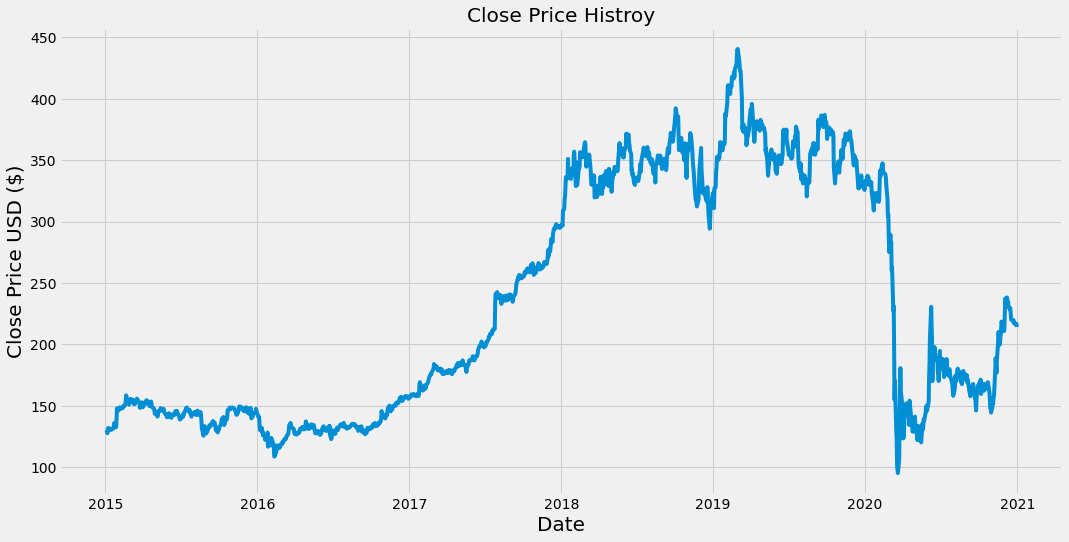

In [1]:
#import the lib 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas_datareader import data
from google.colab import files
import math
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Activation , LSTM, Dropout

#from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')

#Load the data 
from google.colab import files
#uploaded = files.upload()

tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2015-01-01'
end_date = '2020-01-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
data = data.DataReader("BA", "yahoo", "2015-01-01","2021-01-01")

data.shape

plt.figure(figsize=(16,8))
plt.title('Close Price Histroy')
plt.plot(data['Close'])
plt.xlabel('Date' , fontsize  = 20 )
plt.ylabel('Close Price USD ($)', fontsize = 20)
#plt.show()

dataClose = data.filter(['Close'])

dataset = dataClose.values

training_data_len = math.ceil( len(dataset) * .8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

train_data = scaled_data[0:training_data_len,:] 

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 60 :
    print(x_train)
    print(y_train)
    print()
                  
x_train , y_train = np.array(x_train) , np.array(y_train)

#Reshap the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#print(x_train.shape[1]) 

model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size = 1,epochs = 1) 

test_data = scaled_data[training_data_len - 60 : , :] 

x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test ,(x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()
#model.add(LSTM(50,return_sequences=True,input_shape(x_train.shape[1],1)))
#print(training_data_len)
#data.to_csv('export_dataframe.csv', index = False, header=True)
#files.download('export_dataframe.csv')
#print(data)
#c = data['Close']
#c.plot()